In [1]:
import subprocess

In [ ]:
%%writefile scf.in
#************************************************************************************************
#*                         Generated by cif2cell 1.2.10 2019-10-21 3:07                         *
#*        T. Bjorkman, Comp. Phys. Commun. 182, 1183-1186 (2011). Please cite generously.       *
#*                                                                                              *
#*                      Data obtained from COD. Reference number : 1010993                      *
#*                                Mo S2   (Molybdenum disulfide)                                *
#* Dickinson, R G and Pauling, L, Journal of the American Chemical Society 45, 1466-1471 (1923) *
#************************************************************************************************

&CONTROL
  calculation='scf',
  outdir='.',
  prefix='MoS2',
  pseudo_dir='.',
  verbosity='low',
  tprnfor=.true.,
  tstress=.true.,
/

&SYSTEM
  ibrav = 0
  A =    3.15000
  nat = 6
  ntyp = 2
  ecutwfc=50,
  ecutrho=250,
  input_dft='pbe',
  occupations='smearing',
  smearing='mv',
  degauss=0.005d0,
/

&ELECTRONS
  conv_thr=1d-08,
  mixing_beta=0.7d0,
/

CELL_PARAMETERS {alat}
  0.866025403784439  -0.500000000000000   0.000000000000000 
  0.000000000000000   1.000000000000000   0.000000000000000 
  0.000000000000000   0.000000000000000   3.904761904761905 
ATOMIC_SPECIES
  Mo   95.96000   Mo.pbe-spn-kjpaw_psl.0.2.UPF
   S   32.06750   S.pbe-n-kjpaw_psl.1.0.0.UPF
ATOMIC_POSITIONS {crystal}
Mo   0.333333333333333   0.666666666666667   0.250000000000000 
Mo   0.666666666666667   0.333333333333333   0.750000000000000 
 S   0.333333333333333   0.666666666666667   0.621000000000000 
 S   0.333333333333333   0.666666666666667   0.879000000000000 
 S   0.666666666666667   0.333333333333333   0.121000000000000 
 S   0.666666666666667   0.333333333333333   0.379000000000000 

K_POINTS {automatic}
   3 3 3 0 0 0

In [2]:
subprocess.check_output("mpirun -n 1 pw.x -in scf.in > scf.out", shell=True)

b''

In [ ]:
%%writefile bands.in
#************************************************************************************************
#*                         Generated by cif2cell 1.2.10 2019-10-21 3:07                         *
#*        T. Bjorkman, Comp. Phys. Commun. 182, 1183-1186 (2011). Please cite generously.       *
#*                                                                                              *
#*                      Data obtained from COD. Reference number : 1010993                      *
#*                                Mo S2   (Molybdenum disulfide)                                *
#* Dickinson, R G and Pauling, L, Journal of the American Chemical Society 45, 1466-1471 (1923) *
#************************************************************************************************

&CONTROL
  calculation='bands',
  outdir='.',
  prefix='MoS2',
  pseudo_dir='.',
  verbosity='low',
  tprnfor=.true.,
  tstress=.true.,
/

&SYSTEM
  ibrav = 0
  A =    3.15000
  nat = 6
  ntyp = 2
  ecutwfc=50,
  ecutrho=250,
  nbnd=30,
  input_dft='pbe',
  occupations='smearing',
  smearing='mv',
  degauss=0.005d0,
/

&ELECTRONS
  conv_thr=1d-08,
  mixing_beta=0.7d0,
/

CELL_PARAMETERS {alat}
  0.866025403784439  -0.500000000000000   0.000000000000000 
  0.000000000000000   1.000000000000000   0.000000000000000 
  0.000000000000000   0.000000000000000   3.904761904761905 
ATOMIC_SPECIES
  Mo   95.96000   Mo.pbe-spn-kjpaw_psl.0.2.UPF
   S   32.06750   S.pbe-n-kjpaw_psl.1.0.0.UPF
ATOMIC_POSITIONS {crystal}
Mo   0.333333333333333   0.666666666666667   0.250000000000000 
Mo   0.666666666666667   0.333333333333333   0.750000000000000 
 S   0.333333333333333   0.666666666666667   0.621000000000000 
 S   0.333333333333333   0.666666666666667   0.879000000000000 
 S   0.666666666666667   0.333333333333333   0.121000000000000 
 S   0.666666666666667   0.333333333333333   0.379000000000000 

K_POINTS {crystal_b}
10
  0.00  0.00  0.00  30 !G
  0.50  0.00  0.00  30 !M
  0.333 0.333 0.00  30 !K
  0.00  0.00  0.00  30 !G
  0.00  0.00  0.50  30 !A
  0.50  0.00  0.50  30 !L
  0.333 0.333 0.50  30 !H
  0.00  0.00  0.50  30 !A|L
  0.50  0.00  0.00  30 !M|K
  0.333 0.333 0.50  30 !H

In [3]:
subprocess.check_output("mpirun -n 1 pw.x -in bands.in > bands.out", shell=True)

b''

In [ ]:
%%writefile kpdos.in
&projwfc
   outdir='.',
   prefix='MoS2',
   ngauss=0, degauss=0.036748
   DeltaE=0.01
   kresolveddos=.true.
   filpdos='MoS2.k'
   filproj='MoS2proj.k'
/

In [4]:
subprocess.check_output("mpirun -n 1 projwfc.x -in kpdos.in > kpdos.out", shell=True)

b''

In [5]:
import os
os.environ["QT_QPA_PLATFORM"] = "offscreen"

 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 5.4.0 created on June 17th, 2020

Please cite: Herath, U., Tavadze, P., He, X., Bousquet, E., Singh, S., Mu√±oz, F. & Romero,    A., PyProcar: A Python library for electronic structure pre/post-processing.,    Computer Physics Communications 251 (2020):107080.

Script initiated
code           :  qe
input file     :  None
mode           :  plain
spin comp.     :  0
atoms list     :  [-1]
orbs. list     :  [-1]
fermi energy   :  None
energy range   :  [-5, 5]
colormap       :  jet
markersize     :  0.02
permissive     :  False
vmax           :  None
vmin           :  None
grid enabled   :  True
human          :  False
savefig        :  None
title          :  None
outcar         :  None
k-grid         :  reduced
k

findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.


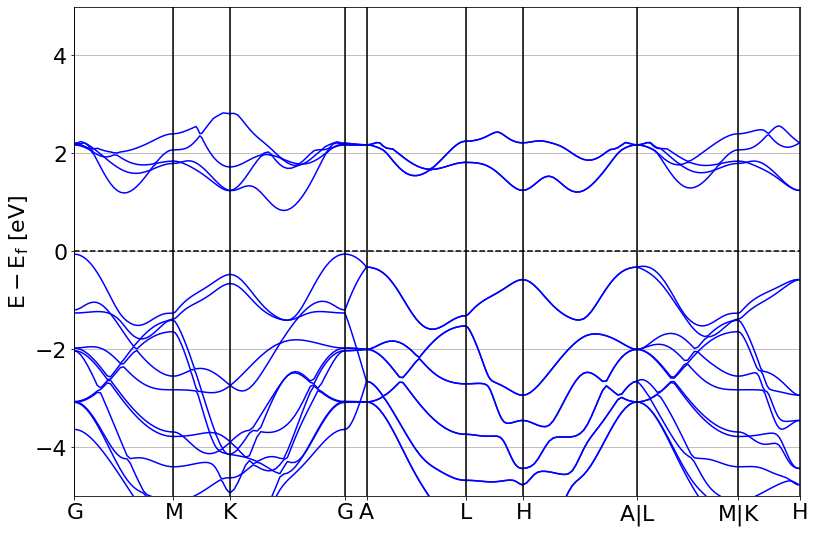

(<Figure size 936x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2628747c0>)

In [6]:
import pyprocar
pyprocar.bandsplot(code='qe',mode='plain', elimit=[-5,5])